In [88]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense, LSTM

In [90]:

Corpus = pd.read_excel(r"C:\Users\mutangamb\Desktop\FRC\hatespeechdata.xlsx",encoding='latin-1')

In [91]:
Corpus.head()

,Unnamed: 0,v2,v1
0,0,#cnn calls #michigan middle school 'build the...,negative
1,1,no comment! in #australia #opkillingbay #se...,negative
2,2,retweet if you agree!,negative
3,3,@user @user lumpy says i am a . prove it lumpy.,negative
4,4,it's unbelievable that in the 21st century we'...,negative


In [93]:
Corpus.shape

(11306, 3)

In [94]:
# Step - a : Remove blank rows if any.
Corpus['v2'].dropna(inplace=True)# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['v2'] = [entry.lower() for entry in Corpus['v2']]# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['v2']= [word_tokenize(entry) for entry in Corpus['v2']]# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV 
for index,entry in enumerate(Corpus['v2']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'v2'] = str(Final_words)

In [95]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['v2'],Corpus['v1'],test_size=0.2)

In [96]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [97]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['v2'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [98]:
print(Tfidf_vect.vocabulary_)

{'cnn': 716, 'call': 556, 'michigan': 2657, 'middle': 2665, 'school': 3658, 'wall': 4763, 'chant': 628, 'tcot': 4253, 'comment': 746, 'australia': 237, 'opkillingbay': 3117, 'seashepherd': 3676, 'helpcovedolphins': 1659, 'thecove': 4344, 'retweet': 3554, 'agree': 59, 'user': 4688, 'lumpy': 2419, 'say': 3647, 'prove': 3386, 'unbelievable': 4648, 'century': 618, 'need': 2927, 'something': 3896, 'like': 2285, 'neverump': 2960, 'xenophobia': 4940, 'let': 2244, 'fight': 1358, 'love': 2400, 'peace': 3194, 'white': 4832, 'establishment': 1226, 'ca': 547, 'blk': 404, 'folx': 1408, 'run': 3613, 'around': 194, 'promote': 3374, 'greatness': 1559, 'hey': 1666, 'people': 3207, 'race': 3425, 'altright': 113, 'us': 4684, 'amp': 133, 'insecurity': 1877, 'lure': 2425, 'men': 2613, 'whitesupremacy': 4855, 'interested': 1888, 'linguistics': 2301, 'address': 36, 'racism': 3429, 'power': 3321, 'mock': 2745, 'obama': 3061, 'black': 387, 'brexit': 486, 'protest': 3383, 'trump': 4594, 'republican': 3531, 'fuh

In [99]:
print(Train_X_Tfidf)

  (0, 4688)	0.17326452466397274
  (0, 3793)	0.3562668036689213
  (0, 3292)	0.33780598511388205
  (0, 2669)	0.33780598511388205
  (0, 2267)	0.7074243049694121
  (0, 2264)	0.3381988389653658
  (1, 4638)	0.32952254475922854
  (1, 3706)	0.4132878067710304
  (1, 2847)	0.35099331307087706
  (1, 2400)	0.26383882036791123
  (1, 1030)	0.40571619066731324
  (1, 910)	0.3199080418292187
  (1, 402)	0.4404809872363204
  (1, 380)	0.1421390750008115
  (1, 133)	0.21593298256825286
  (2, 4766)	0.37709340429610816
  (2, 4721)	0.45735719159165317
  (2, 4688)	0.42740016814202414
  (2, 3793)	0.4394104681463971
  (2, 3551)	0.44136254761986693
  (2, 2285)	0.27941295970266306
  (3, 4638)	0.40210631907306604
  (3, 4283)	0.5323777860415217
  (3, 3764)	0.3825778613383445
  (3, 2362)	0.3075135621835258
  :	:
  (9038, 380)	0.12725060746387273
  (9039, 4407)	0.7108156104629748
  (9039, 2100)	0.5031923879416395
  (9039, 1295)	0.4914657553072638
  (9040, 4500)	0.33605185745895566
  (9040, 3210)	0.3536309681097206
  (9

In [100]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  88.28470380194518


In [101]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predictions_NB, Test_Y))

[[ 935   75]
 [ 190 1062]]


In [102]:
print (classification_report(predictions_NB, Test_Y))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1010
           1       0.93      0.85      0.89      1252

   micro avg       0.88      0.88      0.88      2262
   macro avg       0.88      0.89      0.88      2262
weighted avg       0.89      0.88      0.88      2262



In [103]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  90.18567639257294


In [104]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predictions_SVM, Test_Y))

[[1007  104]
 [ 118 1033]]


In [105]:
#print (classification_report(print(confusion_matrix(predictions_SVM, Test_Y))))
print (classification_report(predictions_SVM, Test_Y))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1111
           1       0.91      0.90      0.90      1151

   micro avg       0.90      0.90      0.90      2262
   macro avg       0.90      0.90      0.90      2262
weighted avg       0.90      0.90      0.90      2262



In [106]:
#print (classification_report(predictions_LR, Test_Y))

In [107]:
LR=LogisticRegression()
LR.fit(Train_X_Tfidf,Train_Y)# predict the labels on validation dataset
predictions_LR = LR.predict(Test_X_Tfidf)# Use accuracy_score function to get the accuracy
print("LR Accuracy Score -> ",accuracy_score(predictions_LR, Test_Y)*100)

LR Accuracy Score ->  89.8762157382847


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [108]:
print(confusion_matrix(predictions_LR, Test_Y))

[[1007  111]
 [ 118 1026]]


In [109]:
print (classification_report(predictions_LR, Test_Y))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1118
           1       0.90      0.90      0.90      1144

   micro avg       0.90      0.90      0.90      2262
   macro avg       0.90      0.90      0.90      2262
weighted avg       0.90      0.90      0.90      2262



In [110]:
def plot_heatmapx(cm,title):
    df_cm2 = pd.DataFrame(cm, index = ['hate', 'neutral'])
    df_cm2.columns=['hate','neutral']

    ax = plt.axes()
    sns.heatmap(df_cm2, annot=True, fmt="d", linewidths=.5,ax=ax)
    ax.set_title(title)
    plt.show()

    
    return

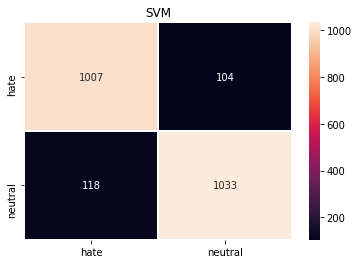

In [111]:
plot_heatmap(confusion_matri(predictions_SVM, Test_Y),'SVM')

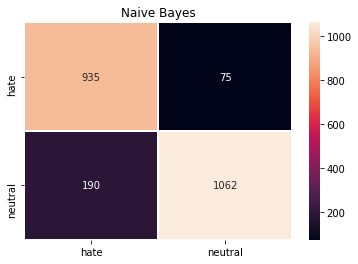

In [112]:
plot_heatmap(confusion_matrix(predictions_NB, Test_Y),'Naive Bayes')

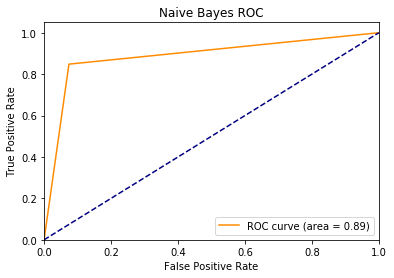

In [113]:
from sklearn.metrics import roc_curve, auc
y_pred = classifier.predict(X_test)
probs=classifier.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(probs, Test_Y)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC')
plt.legend(loc="lower right")
plt.show()

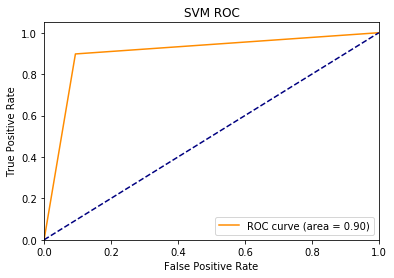

In [114]:
fpr, tpr, thresholds = roc_curve(predictions_SVM, Test_Y)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC')
plt.legend(loc="lower right")
plt.show()

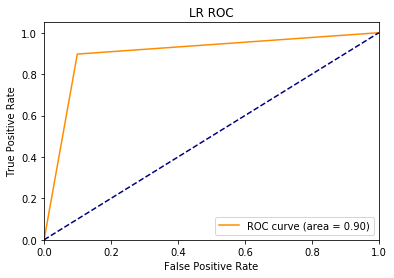

In [115]:
from sklearn.metrics import roc_curve, auc
#y_pred = classifier.predict(X_test)
#probs=classifier.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(predictions_LR, Test_Y)
roc_auc = auc(fpr, tpr)

plt.figure()
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR ROC')
plt.legend(loc="lower right")
plt.show()

In [116]:
def get_LSTM_model():    
    model = Sequential()
    model.add(Embedding(1000, 32))
    model.add(LSTM(5000))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model
#m_LSTM = get_LSTM_model()
#check_model(m,cnn_texts_mat,y_train,cnn_texts_mat_tst ,y_test)
#history_lstm = m_LSTM.fit(Test_Y,Train_Y, epochs=10, batch_size=60, validation_split=0.2)
#acc = history_lstm.history['acc']
#val_acc = history_lstm.history['val_acc']
#loss = history_lstm.history['loss']
#val_loss = history_lstm.history['val_loss']
#epochs = range(len(acc))